<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/16_document_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Install required libraries
!pip install -q albumentations opencv-python-headless


In [4]:
# Step 2: Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import albumentations as A

In [5]:
# Step 3: Generate a synthetic document image using PIL
img = Image.new("L", (400, 200), color=255)  # grayscale (white background)
draw = ImageDraw.Draw(img)
draw.text((20, 80), "Invoice #456 - Due Today", fill=0)
draw.text((20, 120), "Amount: $1200", fill=0)
doc_img = np.array(img)


In [6]:
# Step 4: Define albumentations augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=10, border_mode=cv2.BORDER_CONSTANT, value=255, p=1.0),
    A.GaussianBlur(blur_limit=(3, 7), p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.ImageCompression(quality_lower=30, quality_upper=60, p=0.5),
    A.Downscale(scale_min=0.7, scale_max=0.9, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)
])

<ipython-input-6-0ecbc0ee1a7e>:3: UserWarning: Argument(s) 'value' are not valid for transform Rotate
  A.Rotate(limit=10, border_mode=cv2.BORDER_CONSTANT, value=255, p=1.0),
<ipython-input-6-0ecbc0ee1a7e>:6: UserWarning: Argument(s) 'quality_lower, quality_upper' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=30, quality_upper=60, p=0.5),
<ipython-input-6-0ecbc0ee1a7e>:7: UserWarning: Argument(s) 'scale_min, scale_max' are not valid for transform Downscale
  A.Downscale(scale_min=0.7, scale_max=0.9, p=0.5),
<ipython-input-6-0ecbc0ee1a7e>:8: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)


In [7]:
# Step 5: Apply the transformation
augmented = transform(image=doc_img)['image']

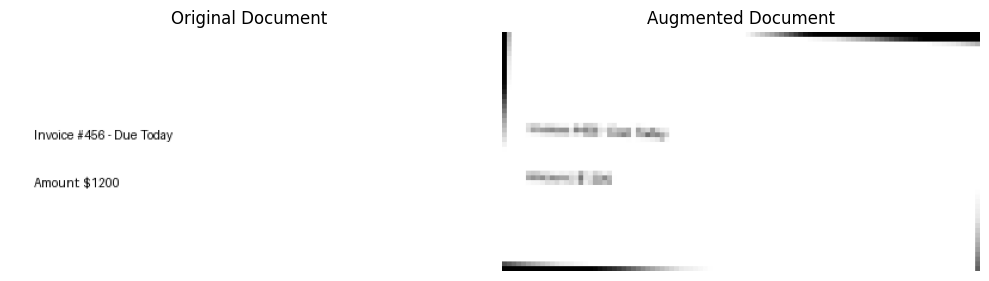

In [10]:
# Step 6: Visualize the result
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(doc_img, cmap='gray')
plt.title("Original Document")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented, cmap='gray')
plt.title("Augmented Document")
plt.axis('off')

plt.tight_layout()
plt.show()
